# Plot cluster map of samples hallmark gene set NES

Script related to figure s5b

### Aim:
- Plot clustermap of hallmark NES as additional visualisation

In [1]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [2]:
import warnings
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [3]:
home = '~/git_repos/HGSOC_TME_Heterogeneity/'

## Get sample labels

### Load file

In [4]:
file_keys = home + 'Data/5/NACT_SampleLabels.txt'

sample_labels = pd.read_csv(file_keys,
                            sep='\t',
                            index_col='Well')

In [5]:
sample_labels.head()

,Name,Case_mRNA,NACT,Site,Bounds
Well,,,,,
A01,A01_3368A_Liver,3368,Untreated,other,in
A02,A02_3368B_Liver,3368,Treated,other,out
A03,A03_0371A_R_diaphragm,371,Untreated,other,out
A04,A04_0371B_R_diaphragm,371,Treated,other,out
A05,A05_9717A_R_ovary,9717,Untreated,ovary,in


### Define sample colours

In [6]:
case_mrna = list(set(sample_labels['Case_mRNA']))

colours = sns.color_palette("husl", len(case_mrna)).as_hex()

sample_labels['Colour'] = sample_labels['Case_mRNA'].replace(case_mrna, colours)

## Load ssGSEA results

In [7]:
file_nes = home + 'Data/5/HallmarksStromaImmune_NACT_NES.txt'

data_nes = pd.read_csv(file_nes,
                       sep='\t')

data_nes.set_index('Term',
                   inplace=True)

In [8]:
data_nes.tail()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,D12,E01,E02,E03,E04,E05,E06,E07,E08,E09
Term,,,,,,,,,,,,,,,,,,,,,
HALLMARK_KRAS_SIGNALING_UP,0.168870,0.199723,0.262265,0.241376,0.125993,0.186808,0.154225,0.227833,0.180702,0.176332,...,0.218127,0.225457,0.212735,0.176380,0.254003,0.171851,0.210837,0.260100,0.219746,0.220990
HALLMARK_KRAS_SIGNALING_DN,-0.111366,-0.116319,-0.122007,-0.096597,-0.106269,-0.118997,-0.102549,-0.109274,-0.136147,-0.115405,...,-0.139325,-0.162815,-0.121599,-0.190920,-0.141080,-0.111751,-0.141831,-0.126286,-0.127925,-0.167178
HALLMARK_PANCREAS_BETA_CELLS,-0.146457,-0.171530,-0.229520,-0.139607,-0.137008,-0.151976,-0.239809,-0.162335,-0.164499,-0.187457,...,-0.228200,-0.152731,-0.218332,-0.196034,-0.157134,-0.126800,-0.179381,-0.216867,-0.193094,-0.209325
StromalSignature,0.068301,0.070667,0.269651,0.224186,0.023423,0.157401,0.155407,0.292664,0.095977,0.135368,...,0.104112,0.155909,0.228005,0.088713,0.296492,0.180196,0.221126,0.332099,0.245865,0.172484
ImmuneSignature,0.074691,0.169467,0.345730,0.317359,0.069114,0.197182,0.135779,0.299572,0.063372,0.103880,...,0.153753,0.167914,0.175292,0.058984,0.256096,0.108475,0.235833,0.393539,0.265829,0.201392


### Define gene set colors

In [9]:
GREEN = '#007F00'
RED = '#CC0000'
GREY = '#D3D3D3'
BLUE = '#0000E5'
YELLOW = '#FFFF00'

color_sets = {
'HALLMARK_INTERFERON_ALPHA_RESPONSE':           GREEN,
'HALLMARK_INTERFERON_GAMMA_RESPONSE':           GREEN,
'ImmuneSignature':                              GREEN,
'HALLMARK_E2F_TARGETS':                         RED,
'HALLMARK_SPERMATOGENESIS':                     GREY,
'HALLMARK_INFLAMMATORY_RESPONSE':               GREEN,
'HALLMARK_G2M_CHECKPOINT':                      RED,
'HALLMARK_PANCREAS_BETA_CELLS':                 GREY,
'HALLMARK_OXIDATIVE_PHOSPHORYLATION':           GREY,
'HALLMARK_MYC_TARGETS_V1':                      RED,
'HALLMARK_FATTY_ACID_METABOLISM':               GREY,
'HALLMARK_PEROXISOME':                          GREY,
'HALLMARK_DNA_REPAIR':                          RED,
'HALLMARK_UNFOLDED_PROTEIN_RESPONSE':           'purple',
'HALLMARK_KRAS_SIGNALING_DN':                   RED,
'HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY':     'purple',
'HALLMARK_CHOLESTEROL_HOMEOSTASIS':             GREY,
'HALLMARK_COMPLEMENT':                          GREEN,
'HALLMARK_MTORC1_SIGNALING':                    RED,
'HALLMARK_IL2_STAT5_SIGNALING':                 GREEN,
'HALLMARK_ADIPOGENESIS':                        GREY,
'HALLMARK_KRAS_SIGNALING_UP':                   RED,
'HALLMARK_HEME_METABOLISM':                     GREY,
'HALLMARK_PI3K_AKT_MTOR_SIGNALING':             RED,
'HALLMARK_ANDROGEN_RESPONSE':                   GREY,
'HALLMARK_PROTEIN_SECRETION':                   GREY,
'HALLMARK_P53_PATHWAY':                         RED,
'HALLMARK_UV_RESPONSE_UP':                      'purple',
'HALLMARK_MYC_TARGETS_V2':                      RED,
'StromalSignature':                             BLUE,
'HALLMARK_MITOTIC_SPINDLE':                     RED,
'HALLMARK_GLYCOLYSIS':                          RED,
'HALLMARK_APICAL_JUNCTION':                     BLUE,
'HALLMARK_HYPOXIA':                             'purple',
'HALLMARK_TNFA_SIGNALING_VIA_NFKB':             GREEN,
'HALLMARK_APOPTOSIS':                           GREY,
'HALLMARK_APICAL_SURFACE':                      GREY,
'HALLMARK_UV_RESPONSE_DN':                      'purple',
'HALLMARK_TGF_BETA_SIGNALING':                  'purple',
'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION':   BLUE,
'HALLMARK_NOTCH_SIGNALING':                     RED,
'HALLMARK_WNT_BETA_CATENIN_SIGNALING':          RED,
'HALLMARK_ALLOGRAFT_REJECTION':                 GREEN,
'HALLMARK_XENOBIOTIC_METABOLISM':               GREY,
'HALLMARK_ANGIOGENESIS':                        BLUE,
'HALLMARK_BILE_ACID_METABOLISM':                GREY,
'HALLMARK_COAGULATION':                         GREY,
'HALLMARK_ESTROGEN_RESPONSE_EARLY':             GREY,
'HALLMARK_ESTROGEN_RESPONSE_LATE':              GREY,
'HALLMARK_HEDGEHOG_SIGNALING':                  RED,
'HALLMARK_IL6_JAK_STAT3_SIGNALING':             GREEN,
'HALLMARK_MYOGENESIS':                          GREY,
'Purity_RNA':                                  'k'
}

In [10]:
color_sets_df = pd.DataFrame.from_dict(color_sets, orient='index')

In [11]:
color_sets_df.head()

,0
HALLMARK_INTERFERON_ALPHA_RESPONSE,#007F00
HALLMARK_INTERFERON_GAMMA_RESPONSE,#007F00
ImmuneSignature,#007F00
HALLMARK_E2F_TARGETS,#CC0000
HALLMARK_SPERMATOGENESIS,#D3D3D3


### Map tumour cellularity info to cmap

In [12]:
mRNA_tumcell_file = home + 'Data/5/NACT_log2exp_loess_norm_filtered_ESTIMATE.txt'

mRNA_tumcell = pd.read_csv(mRNA_tumcell_file,
                           skiprows=2,
                           sep='\t',
                           index_col='NAME')

del(mRNA_tumcell['Description'])

mRNA_tumcell.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,D12,E01,E02,E03,E04,E05,E06,E07,E08,E09
NAME,,,,,,,,,,,,,,,,,,,,,
StromalScore,150.243978,100.962227,967.051900,808.453034,-65.569315,489.893858,490.720381,1061.377025,235.450362,418.150347,...,263.744096,464.939728,802.734452,153.081049,1103.804616,579.702569,788.616732,1237.456125,887.344608,501.153545
ImmuneScore,176.145317,526.978700,1297.193578,1203.727348,131.468582,650.323221,407.055460,1082.029608,88.028614,282.209677,...,481.526245,516.592649,582.005013,29.396052,908.321033,258.334588,849.462145,1496.053219,969.848566,621.394231
ESTIMATEScore,326.389295,627.940928,2264.245478,2012.180381,65.899267,1140.217080,897.775841,2143.406633,323.478976,700.360025,...,745.270341,981.532377,1384.739465,182.477100,2012.125649,838.037157,1638.078877,2733.509343,1857.193174,1122.547776
TumorPurity,0.794327,0.766668,0.591924,0.621334,0.816969,0.716267,0.740642,0.606127,0.794586,0.759799,...,0.755497,0.732326,0.690764,0.806982,0.621341,0.746506,0.663403,0.535046,0.638998,0.718075


In [13]:
sample_labels['TumourCellularity_mRNA'] = mRNA_tumcell.loc['TumorPurity']

### Separate matched and unmatched samples

In [14]:
matched = [3368,371,9717,8674,2359,564,7765,6965,9347]

matched_df = sample_labels[sample_labels['Case_mRNA'].isin(matched)]

unmatched_df = sample_labels[~sample_labels['Case_mRNA'].isin(matched)]

In [15]:
matched_df.head()

,Name,Case_mRNA,NACT,Site,Bounds,Colour,TumourCellularity_mRNA
Well,,,,,,,
A01,A01_3368A_Liver,3368,Untreated,other,in,#62ae31,0.794327
A02,A02_3368B_Liver,3368,Treated,other,out,#62ae31,0.766668
A03,A03_0371A_R_diaphragm,371,Untreated,other,out,#f45deb,0.591924
A04,A04_0371B_R_diaphragm,371,Treated,other,out,#f45deb,0.621334
A05,A05_9717A_R_ovary,9717,Untreated,ovary,in,#f564d1,0.816969


In [16]:
matched_nes_df = data_nes[matched_df.index]

unmatched_nes_df = data_nes[unmatched_df.index]

### Tumour cellularity

In [17]:
cmp = plt.cm.binary
norm = matplotlib.colors.Normalize(vmin=matched_df['TumourCellularity_mRNA'].min(),
                                   vmax=matched_df['TumourCellularity_mRNA'].max(),
                                   clip=False)

mapper = cm.ScalarMappable(norm=norm,
                           cmap=cm.binary)

with warnings.catch_warnings():
    
    warnings.simplefilter("ignore")
    matched_tumcell_vals = mapper.to_rgba(matched_df['TumourCellularity_mRNA'])
    print ('NaN Runtimewarning Due To Samples With Missing Purity Caught and Accounted For')

    na_ind = [i for i, x in enumerate(matched_df['TumourCellularity_mRNA'].isna()) if x]

matched_tumcell_vals[na_ind] = [0,0,0,0]


NaN Runtimewarning Due To Samples With Missing Purity Caught and Accounted For


In [18]:
cmp = plt.cm.binary
norm = matplotlib.colors.Normalize(vmin=unmatched_df['TumourCellularity_mRNA'].min(),
                                   vmax=unmatched_df['TumourCellularity_mRNA'].max(),
                                   clip=False)

mapper = cm.ScalarMappable(norm=norm,
                           cmap=cm.binary)

with warnings.catch_warnings():
    
    warnings.simplefilter("ignore")
    unmatched_tumcell_vals = mapper.to_rgba(unmatched_df['TumourCellularity_mRNA'])
    print ('NaN Runtimewarning Due To Samples With Missing Purity Caught and Accounted For')

    na_ind = [i for i, x in enumerate(unmatched_df['TumourCellularity_mRNA'].isna()) if x]

unmatched_tumcell_vals[na_ind] = [0,0,0,0]


NaN Runtimewarning Due To Samples With Missing Purity Caught and Accounted For


In [19]:
matched_df["NACT_colour"] = matched_df["NACT"].replace(["Untreated","Treated"],["b","r"])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
matched_df.head()

,Name,Case_mRNA,NACT,Site,Bounds,Colour,TumourCellularity_mRNA,NACT_colour
Well,,,,,,,,
A01,A01_3368A_Liver,3368,Untreated,other,in,#62ae31,0.794327,b
A02,A02_3368B_Liver,3368,Treated,other,out,#62ae31,0.766668,r
A03,A03_0371A_R_diaphragm,371,Untreated,other,out,#f45deb,0.591924,b
A04,A04_0371B_R_diaphragm,371,Treated,other,out,#f45deb,0.621334,r
A05,A05_9717A_R_ovary,9717,Untreated,ovary,in,#f564d1,0.816969,b


## Plot matched

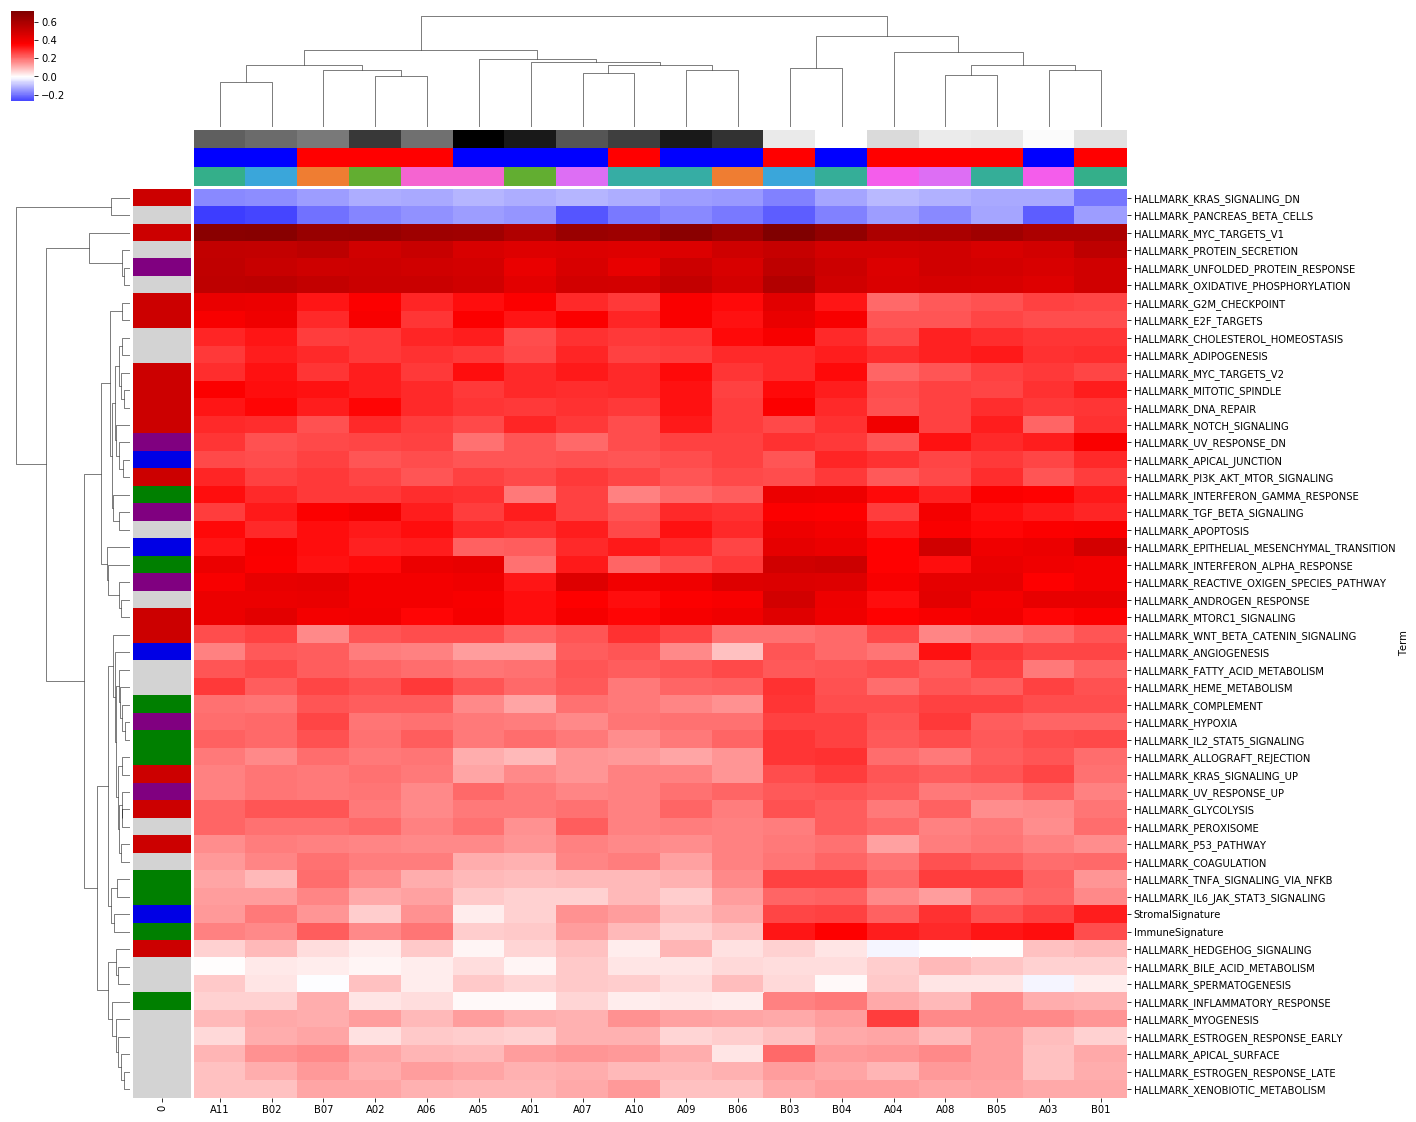

In [21]:
g1 = sns.clustermap(matched_nes_df,
                    cmap='seismic',
                    center=0,
                    figsize = (20,20),
                    col_colors=[matched_tumcell_vals,
                                matched_df["NACT_colour"],
                                matched_df['Colour']],
                    row_colors=color_sets_df[0],
                    linewidths=0.0, rasterized=True
                   )

### Save plot

In [22]:
g1.savefig('../../Figures/supplementary/5/panels/s5b_NACT_matched_Hallmarks_NES_clustermap.pdf',
           bbox='tight')

## Plot unmatched

In [23]:
unmatched_df["NACT_colour"] = unmatched_df["NACT"].replace(["Untreated","Treated"],["b","r"])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
unmatched_df.head()

,Name,Case_mRNA,NACT,Site,Bounds,Colour,TumourCellularity_mRNA,NACT_colour
Well,,,,,,,,
B08,B08_9883A_Abdominal_Wall,9883,Untreated,other,out,#97a431,0.771557,b
B09,B09_9883B_R_ovary,9883,Treated,ovary,out,#97a431,0.770038,r
B10,B10_6229A_Posterior_cul_de_sac,6229,Untreated,other,in,#46a1f4,0.624749,b
B11,B11_6229B_R_ovary,6229,Treated,ovary,out,#46a1f4,0.713719,r
B12,B12_1573A_Pelvic_soft_tissue_box,1573,Untreated,other,in,#82a931,0.865876,b


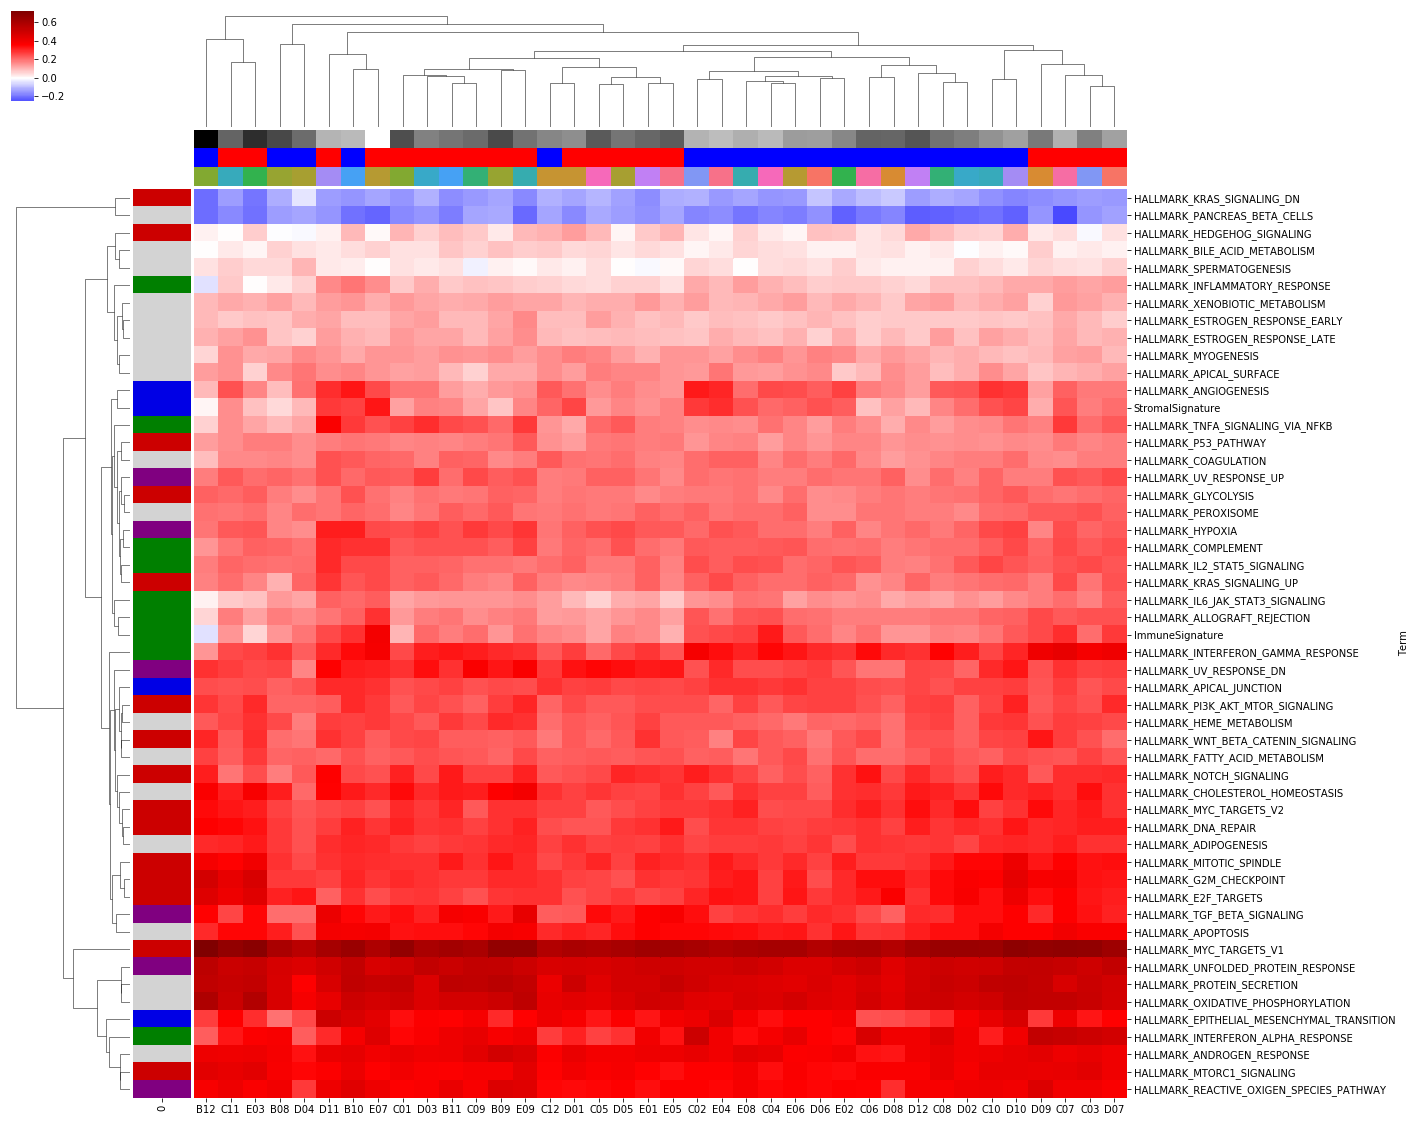

In [25]:
g2 = sns.clustermap(unmatched_nes_df,
                    cmap='seismic',
                    center=0,
                    figsize = (20,20),
                    col_colors=[unmatched_tumcell_vals,
                                unmatched_df["NACT_colour"],
                                unmatched_df['Colour']],
                    row_colors=color_sets_df[0],
                    linewidths=0.0, rasterized=True
                   )

### Save plot

In [26]:
g2.savefig('../../Figures/supplementary/5/panels/s5b_NACT_unmatched_Hallmarks_NES_clustermap.pdf', bbox='tight')

# End script